In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib as plt
import seaborn as sns
import sklearn
sns.set()

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Import of necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import data

In [3]:
data = pd.read_csv("data\simple_linear_regression.csv")

In [4]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Define independent and dependent variable


In [6]:
y = data['GPA']
x1 = data['SAT']

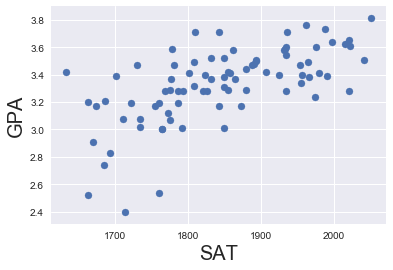

In [7]:
plt.scatter(x1, y)
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()

### Regression model

In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           7.20e-11
Time:                        14:59:31   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

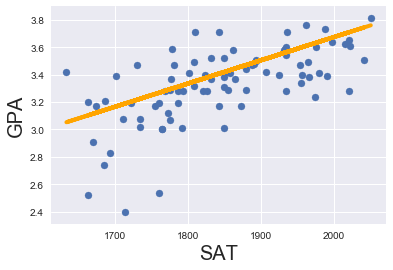

In [9]:
plt.scatter(x1, y)
yhat = 0.275 + 0.0017*x1
plt.plot( x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()

# Home Work - Linear Regression

In [10]:
data = pd.read_csv(r"data\real_estate_price_size.csv")

In [11]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


## Define variables


In [12]:
y = data['price']
x1 = data['size']

## Visualize data  

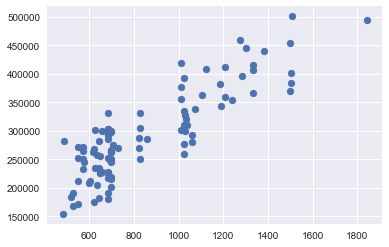

In [13]:
plt.scatter(x1,y)

## Regression model

In [19]:
#x = sm.add_constant(x1)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3352.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.68e-78
Time:                        15:06:28   Log-Likelihood:                -1226.2
No. Observations:                 100   AIC:                             2454.
Df Residuals:                      99   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
size         329.7765      5.696     57.896      0.000     318.474     341.079
==============================================================================
Omnibus:                        1.877   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.730
Skew:                          -0.320   Prob(JB):                        0.421
Kurtosis:                       2.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Vizualize data and regression model

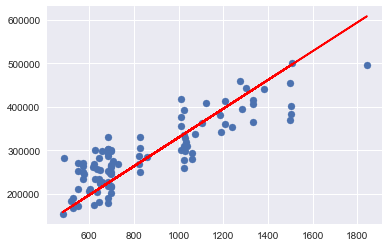

In [17]:
yhat = 329.7765*x1
plt.scatter(x1,y)
plt.plot(x1, yhat, c='red')
plt.show()